In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ziya07/smart-grid-stability-and-reliability-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/smart-grid-stability-and-reliability-dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# Load data
df = pd.read_csv(path + "/smart_grid_stability_dataset.csv")
df.head()

,Voltage (V),Current (A),Power Factor (PF),Frequency (Hz),Transformer Load (%),Reactive Power (kVAR),Active Power (kW),Harmonic Distortion (%),Battery Storage Level (%),Smart Meter Readings (kWh),...,Fault Type,Weather Conditions - Temperature (°C),Weather Conditions - Wind Speed (km/h),Weather Conditions - Humidity (%),Weather Conditions - Precipitation (mm),Solar Radiation (W/m²),Energy Demand Forecast (MW),Grid Interconnection Status,Grid Stability,Failure Risk
0,211.980686,187.109222,0.918837,49.851204,90.194492,86.682294,184.130054,1.907946,38.363622,34.770049,...,NaN,20.223796,48.595775,68.653829,132.755105,43.009743,81.502648,0,1,High
1,248.094031,390.792451,0.774413,49.739976,78.601589,95.100175,296.885881,0.229898,78.403971,43.776832,...,Voltage Sag,31.898393,93.173555,86.997948,116.788986,876.235268,122.324501,1,1,Medium
2,248.991815,458.921279,0.919168,49.970548,88.778425,34.436598,244.350905,4.786894,64.062054,8.973093,...,NaN,19.368538,26.852792,98.010588,88.661016,186.035739,51.748295,1,0,Medium
3,228.301707,315.095341,0.860966,50.078078,60.715353,27.123383,233.468506,2.768696,33.857261,21.811600,...,Voltage Sag,16.570545,10.155988,72.214515,180.608191,559.234896,53.389685,1,0,High
4,226.909751,424.225449,0.950921,49.693838,97.072904,64.523715,289.373323,1.364141,69.189659,2.469601,...,Frequency Drift,21.570968,52.753073,21.687653,90.246834,151.104529,108.411506,1,1,Low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Voltage (V)                                 1000 non-null   float64
 1   Current (A)                                 1000 non-null   float64
 2   Power Factor (PF)                           1000 non-null   float64
 3   Frequency (Hz)                              1000 non-null   float64
 4   Transformer Load (%)                        1000 non-null   float64
 5   Reactive Power (kVAR)                       1000 non-null   float64
 6   Active Power (kW)                           1000 non-null   float64
 7   Harmonic Distortion (%)                     1000 non-null   float64
 8   Battery Storage Level (%)                   1000 non-null   float64
 9   Smart Meter Readings (kWh)                  1000 non-null   float64
 10  Outage Freque

## Exploratory Data Analysis (EDA)

Analyze the distributions of key grid parameters, identify correlations between variables, and visualize the relationships between environmental factors and grid stability/failure risk.


In [ ]:
# Generate descriptive statistics
df.describe()

,Voltage (V),Current (A),Power Factor (PF),Frequency (Hz),Transformer Load (%),Reactive Power (kVAR),Active Power (kW),Harmonic Distortion (%),Battery Storage Level (%),Smart Meter Readings (kWh),...,Previous Fault Occurrences (count),Load Variability Index,Weather Conditions - Temperature (°C),Weather Conditions - Wind Speed (km/h),Weather Conditions - Humidity (%),Weather Conditions - Precipitation (mm),Solar Radiation (W/m²),Energy Demand Forecast (MW),Grid Interconnection Status,Grid Stability
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,230.144305,276.825842,0.851055,50.009467,79.985501,56.679488,299.411235,2.497319,54.072856,49.668845,...,1.046000,0.553472,19.673614,51.874338,61.722003,100.585147,509.827096,100.648585,0.484000,0.512000
std,11.445388,128.982995,0.084376,0.282053,11.708880,26.319687,116.201476,1.401814,20.246731,28.741267,...,1.028076,0.264824,11.706507,28.586601,23.002024,56.476582,290.270243,29.525364,0.499994,0.500106
min,210.035291,50.099814,0.700007,49.500459,60.040439,10.108164,100.279845,0.001813,20.198153,0.065088,...,0.000000,0.100153,0.014947,0.172176,20.165561,0.026829,0.078978,50.026361,0.000000,0.000000
25%,220.328780,170.825191,0.781896,49.777865,69.664493,34.005730,201.458194,1.275628,36.410847,25.394170,...,0.000000,0.320970,9.558144,27.207444,42.445468,52.032607,260.897197,74.712241,0.000000,0.000000
50%,229.876798,279.512984,0.849584,50.014123,80.326329,56.768082,301.119368,2.506556,54.001018,48.692111,...,1.000000,0.548744,19.282339,53.463625,61.783059,99.544241,502.252074,100.635148,0.000000,1.000000
75%,239.992910,390.796642,0.924356,50.254950,90.169249,79.739346,403.370457,3.711982,72.229355,74.230896,...,2.000000,0.781709,29.949526,76.296329,82.002772,149.704823,760.806293,126.665258,1.000000,1.000000
max,249.998850,499.913194,0.999608,50.497742,99.955752,99.835242,499.613842,4.996511,89.953398,99.880886,...,5.000000,0.999934,39.900974,99.925977,99.835868,199.708698,999.184513,149.932968,1.000000,1.000000


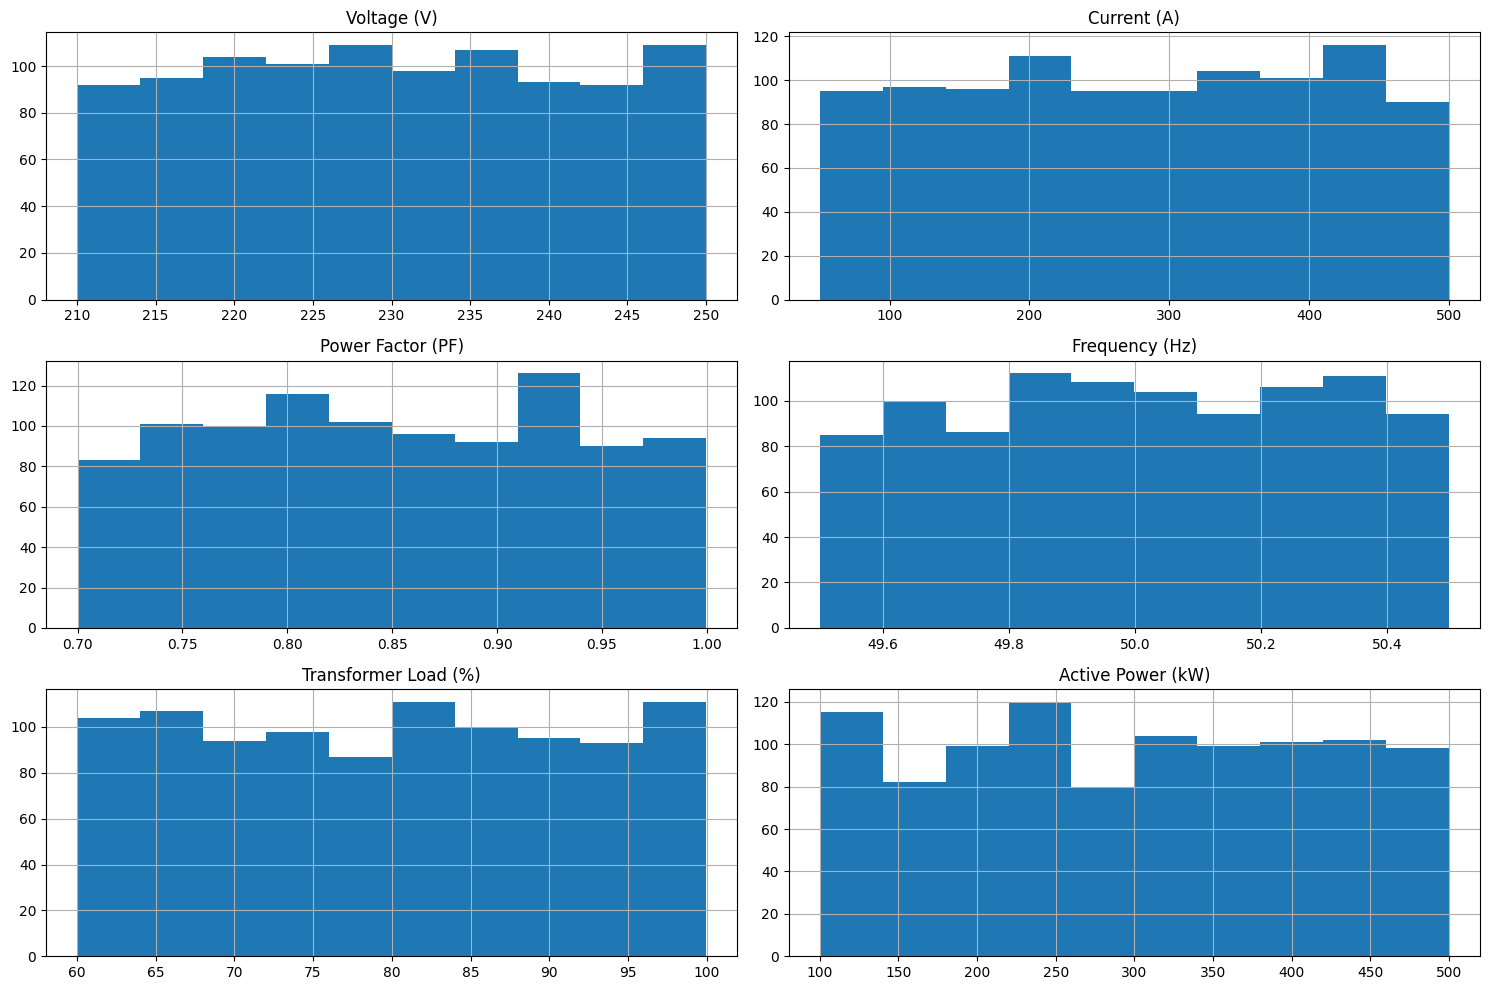

In [ ]:
# Create histograms for key numerical features
key_features = ['Voltage (V)', 'Current (A)', 'Power Factor (PF)', 'Frequency (Hz)', 'Transformer Load (%)', 'Active Power (kW)']
df[key_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()


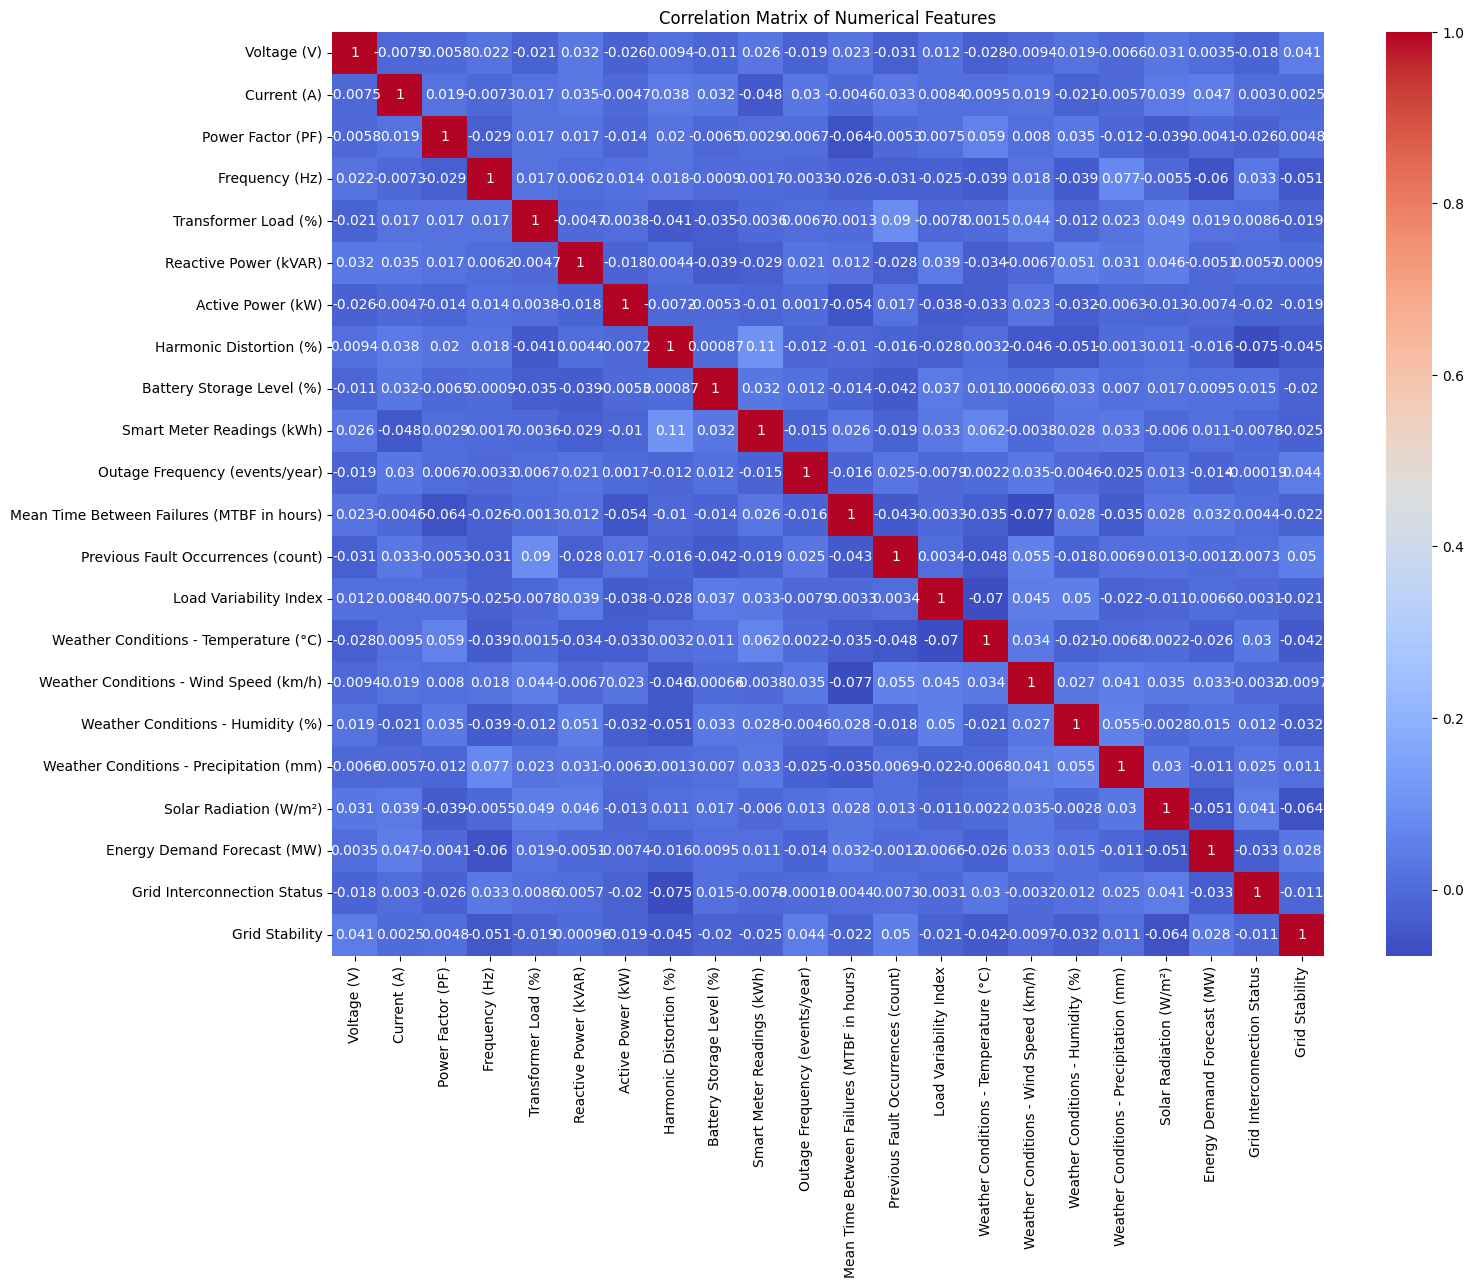

In [ ]:
# Visualize the correlation matrix with heatmap and correlation values
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Visualize the relationship between numerical environmental factors and target variables
environmental_factors = ['Weather Conditions - Temperature (°C)', 'Weather Conditions - Wind Speed (km/h)', 'Weather Conditions - Humidity (%)', 'Weather Conditions - Precipitation (mm)', 'Solar Radiation (W/m²)']
target_variables = ['Grid Stability', 'Failure Risk']

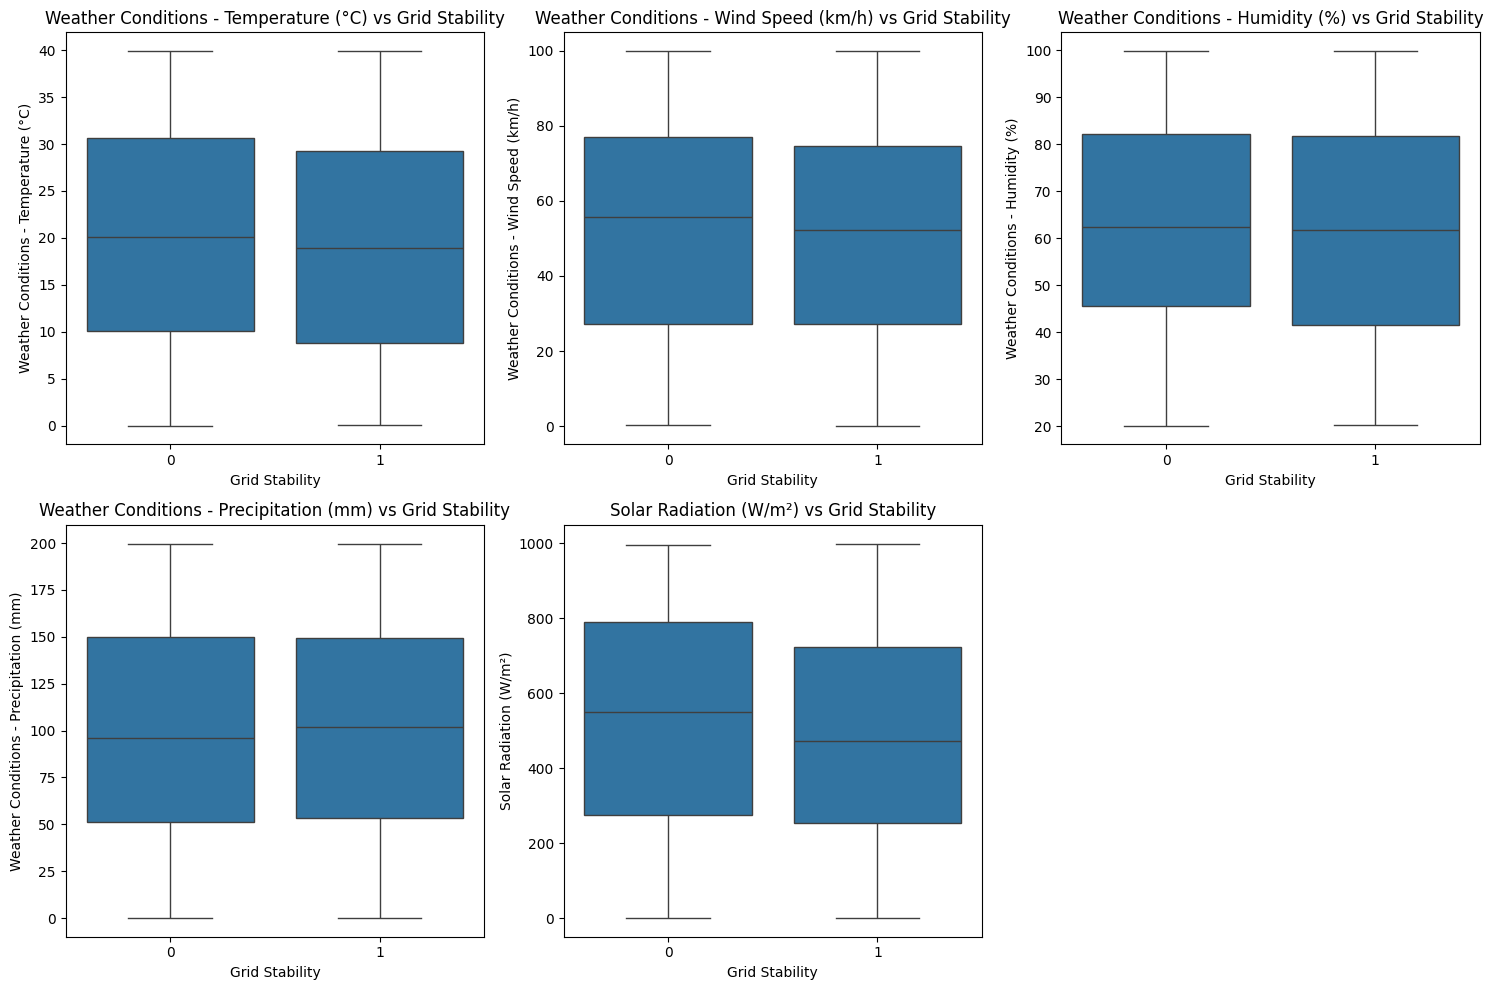

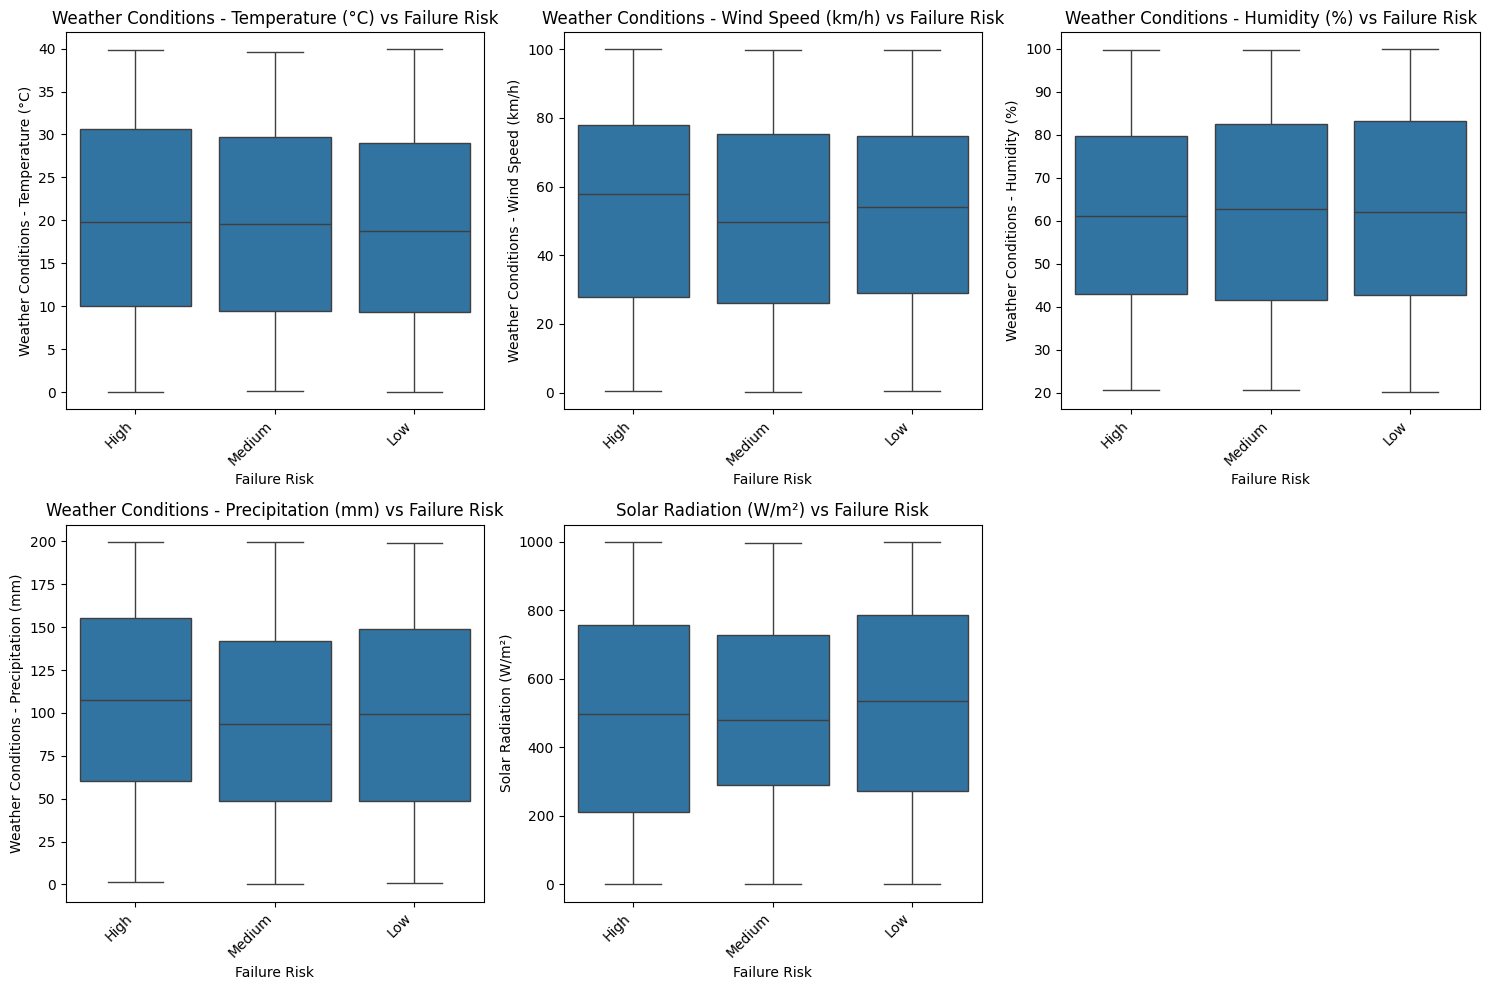

In [ ]:
# Plot
for target in target_variables:
    plt.figure(figsize=(15, 10))
    for i, env_factor in enumerate(environmental_factors):
        plt.subplot(2, 3, i + 1)
        if target == 'Failure Risk':
            # For 'Failure Risk' which is categorical, use boxplot or violinplot
            sns.boxplot(x=df[target], y=df[env_factor])
            plt.title(f'{env_factor} vs {target}')
            plt.xticks(rotation=45, ha='right')
        else:
            # For 'Grid Stability' which is numerical (0 or 1), scatter plot or boxplot is suitable
            sns.boxplot(x=df[target], y=df[env_factor])
            plt.title(f'{env_factor} vs {target}')
    plt.tight_layout()
    plt.show()

## Data preprocessing

Handle missing values (if any), encode categorical variables like 'Fault Type' and 'Failure Risk', and potentially scale numerical features for modeling.


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Voltage (V),0
Current (A),0
Power Factor (PF),0
Frequency (Hz),0
Transformer Load (%),0
Reactive Power (kVAR),0
Active Power (kW),0
Harmonic Distortion (%),0
Battery Storage Level (%),0
Smart Meter Readings (kWh),0


Impute missing values in 'Fault Type' using a new category 'Unknown' and then encode 'Fault Type' and 'Failure Risk' using one-hot and label encoding respectively. Finally, scale the numerical features.



In [ ]:
# Impute missing values in 'Fault Type'
df['Fault Type'] = df['Fault Type'].fillna('Unknown')


In [ ]:
# Encode 'Fault Type' using one-hot encoding
df = pd.get_dummies(df, columns=['Fault Type'], prefix='FaultType')

In [ ]:
# Encode 'Failure Risk' using label encoding
le = LabelEncoder()
df['Failure Risk'] = le.fit_transform(df['Failure Risk'])

In [ ]:
# Identify numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
binary_cols = ['Grid Interconnection Status', 'Grid Stability', 'Failure Risk']
encoded_fault_type_cols = [col for col in df.columns if col.startswith('FaultType_')]

In [ ]:
# Select columns to scale
cols_to_scale = [col for col in numerical_cols if col not in binary_cols + encoded_fault_type_cols]

In [ ]:
# Apply StandardScaler to numerical features
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [ ]:
# Display the first few rows of the preprocessed DataFrame
df.head()

,Voltage (V),Current (A),Power Factor (PF),Frequency (Hz),Transformer Load (%),Reactive Power (kVAR),Active Power (kW),Harmonic Distortion (%),Battery Storage Level (%),Smart Meter Readings (kWh),...,Weather Conditions - Precipitation (mm),Solar Radiation (W/m²),Energy Demand Forecast (MW),Grid Interconnection Status,Grid Stability,Failure Risk,FaultType_Frequency Drift,FaultType_Short Circuit,FaultType_Unknown,FaultType_Voltage Sag
0,-1.587776,-0.695917,0.803735,-0.561391,0.872338,1.140508,-0.992577,-0.420646,-0.776278,-0.518636,...,0.569901,-1.609021,-0.648782,0,1,0,False,False,True,False
1,1.569078,0.884021,-0.908782,-0.955941,-0.118253,1.460500,-0.021743,-1.618300,1.202332,-0.205104,...,0.287056,1.262932,0.734513,1,1,2,False,False,False,True
2,1.647558,1.412485,0.807664,-0.138054,0.751338,-0.845528,-0.474072,1.634112,0.493620,-1.416643,...,-0.211240,-1.116041,-1.657042,1,0,2,False,False,True,False
3,-0.161071,0.296850,0.117529,0.243378,-1.646596,-1.123528,-0.567770,0.193687,-0.998962,-0.969727,...,1.417633,0.170298,-1.601421,1,0,0,False,False,False,True
4,-0.282749,1.143355,1.184180,-1.119603,1.460084,0.298186,-0.086427,-0.808770,0.747003,-1.643033,...,-0.183146,-1.236441,0.263055,1,1,1,True,False,False,False


## Feature engineering

Create new features by calculating apparent power and by creating interaction terms between relevant features, then display the head of the dataframe.


In [ ]:
# Create Apparent Power feature: Apparent Power = sqrt(Active Power^2 + Reactive Power^2)
df['Apparent Power (kVA)'] = (df['Active Power (kW)']**2 + df['Reactive Power (kVAR)']**2)**0.5

In [ ]:
# Create interaction terms (example: Voltage * Current, Active Power * Transformer Load)
df['Voltage * Current'] = df['Voltage (V)'] * df['Current (A)']
df['Active Power * Transformer Load'] = df['Active Power (kW)'] * df['Transformer Load (%)']

In [ ]:
# Interaction between environmental factors and key grid parameters - Temperature * Transformer Load
df['Temperature * Transformer Load'] = df['Weather Conditions - Temperature (°C)'] * df['Transformer Load (%)']

In [ ]:
# Updated DataFrame
df.head()

,Voltage (V),Current (A),Power Factor (PF),Frequency (Hz),Transformer Load (%),Reactive Power (kVAR),Active Power (kW),Harmonic Distortion (%),Battery Storage Level (%),Smart Meter Readings (kWh),...,Grid Stability,Failure Risk,FaultType_Frequency Drift,FaultType_Short Circuit,FaultType_Unknown,FaultType_Voltage Sag,Apparent Power (kVA),Voltage * Current,Active Power * Transformer Load,Temperature * Transformer Load
0,-1.587776,-0.695917,0.803735,-0.561391,0.872338,1.140508,-0.992577,-0.420646,-0.776278,-0.518636,...,1,0,False,False,True,False,1.511942,1.104961,-0.865862,0.041019
1,1.569078,0.884021,-0.908782,-0.955941,-0.118253,1.460500,-0.021743,-1.618300,1.202332,-0.205104,...,1,2,False,False,False,True,1.460662,1.387097,0.002571,-0.123550
2,1.647558,1.412485,0.807664,-0.138054,0.751338,-0.845528,-0.474072,1.634112,0.493620,-1.416643,...,0,2,False,False,True,False,0.969361,2.327151,-0.356188,-0.019590
3,-0.161071,0.296850,0.117529,0.243378,-1.646596,-1.123528,-0.567770,0.193687,-0.998962,-0.969727,...,0,0,False,False,False,True,1.258840,-0.047814,0.934888,0.436685
4,-0.282749,1.143355,1.184180,-1.119603,1.460084,0.298186,-0.086427,-0.808770,0.747003,-1.643033,...,1,1,True,False,False,False,0.310458,-0.323283,-0.126191,0.236764


## Model selection


### target variables
* **Grid Stability** -  is the binary classification target.
* **Failure Risk** -  is the multi-class classification target.

In [ ]:
# For Binary Classification ('Grid Stability'):
binary_classification_models = [
    "Logistic Regression",
    "Random Forest Classifier",
    "Gradient Boosting Classifier",
    "Support Vector Machine (SVM)",
    "Neural Network"
]

In [ ]:
# For Multi-Class Classification ('Failure Risk'):
multi_class_classification_models = [
    "Random Forest Classifier",
    "Gradient Boosting Classifier",
    "Support Vector Machine (SVM) - one-vs-rest or one-vs-one",
    "Neural Network",
    "Decision Tree Classifier",
    "K-Nearest Neighbors (KNN)" # Can be used for multi-class
]

In [ ]:
# Justify the choice of models
print("Suitable models for Binary Classification ('Grid Stability'):")
for model in binary_classification_models:
    print(f"- {model}: Versatile and generally perform well. Logistic Regression is a good baseline, while tree-based models and SVM/Neural Networks can capture complex relationships. Dataset size is moderate, so these should be computationally feasible.")

print("\nSuitable models for Multi-Class Classification ('Failure Risk'):")
for model in multi_class_classification_models:
    print(f"- {model}: Tree-based models handle multiple classes naturally. SVM and Neural Networks can be adapted for multi-class. Decision Trees and KNN are simpler alternatives that can also handle multiple classes. The dataset size is manageable for these algorithms.")


Suitable models for Binary Classification ('Grid Stability'):
- Logistic Regression: Versatile and generally perform well. Logistic Regression is a good baseline, while tree-based models and SVM/Neural Networks can capture complex relationships. Dataset size is moderate, so these should be computationally feasible.
- Random Forest Classifier: Versatile and generally perform well. Logistic Regression is a good baseline, while tree-based models and SVM/Neural Networks can capture complex relationships. Dataset size is moderate, so these should be computationally feasible.
- Gradient Boosting Classifier: Versatile and generally perform well. Logistic Regression is a good baseline, while tree-based models and SVM/Neural Networks can capture complex relationships. Dataset size is moderate, so these should be computationally feasible.
- Support Vector Machine (SVM): Versatile and generally perform well. Logistic Regression is a good baseline, while tree-based models and SVM/Neural Networks c

## Model Training and Evaluation



In [ ]:
# 1. Separate features (X) and target variables (y_stability and y_risk)
X = df.drop(['Grid Stability', 'Failure Risk', 'Fault Type'], axis=1, errors='ignore')
y_stability = df['Grid Stability']
y_risk = df['Failure Risk']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_stability_train, y_stability_test, y_risk_train, y_risk_test = train_test_split(
    X, y_stability, y_risk, test_size=0.2, random_state=42
)


### Grid Stability prediction (Binary Classification)

In [ ]:
# Choose models
stability_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


Training Logistic Regression for Grid Stability...
Logistic Regression Performance:
Accuracy: 0.5050
Precision: 0.5340
Recall: 0.5189
F1-score: 0.5263


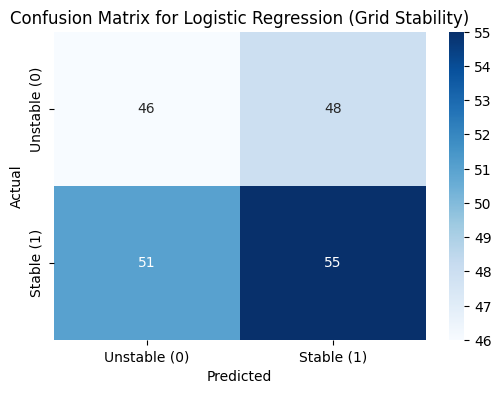


Training Random Forest Classifier for Grid Stability...
Random Forest Classifier Performance:
Accuracy: 0.4800
Precision: 0.5104
Recall: 0.4623
F1-score: 0.4851


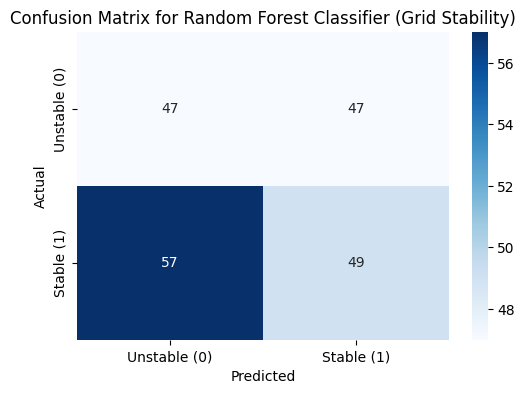


Training Gradient Boosting Classifier for Grid Stability...
Gradient Boosting Classifier Performance:
Accuracy: 0.5000
Precision: 0.5278
Recall: 0.5377
F1-score: 0.5327


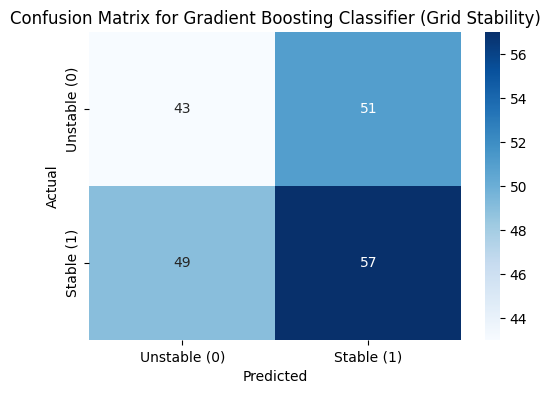

In [ ]:
# Train and predict
for name, model in stability_models.items():
    print(f"\nTraining {name} for Grid Stability...")
    model.fit(X_train, y_stability_train)
    y_stability_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_stability_test, y_stability_pred)
    precision = precision_score(y_stability_test, y_stability_pred)
    recall = recall_score(y_stability_test, y_stability_pred)
    f1 = f1_score(y_stability_test, y_stability_pred)

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_stability_test, y_stability_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unstable (0)', 'Stable (1)'], yticklabels=['Unstable (0)', 'Stable (1)'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name} (Grid Stability)')
    plt.show()


### Failure Risk prediction (Multi-Class Classification)

In [ ]:
# Choose models
risk_models = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


Training Random Forest Classifier for Failure Risk...
Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.32      0.31      0.31        62
           1       0.42      0.32      0.36        75
           2       0.33      0.43      0.37        63

    accuracy                           0.35       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.36      0.35      0.35       200



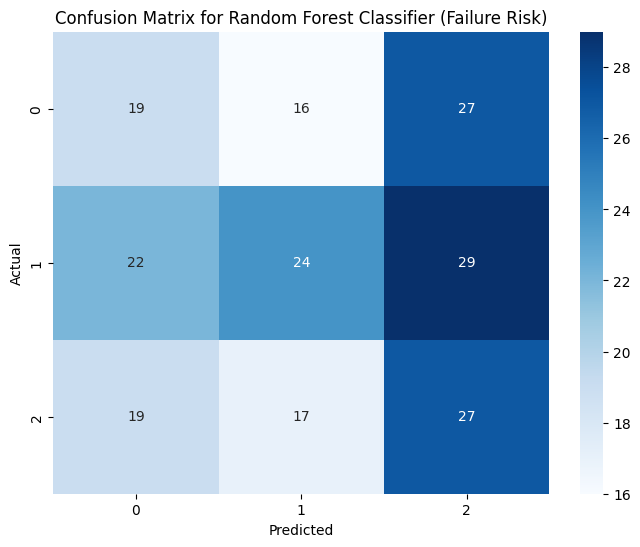


Training Gradient Boosting Classifier for Failure Risk...
Gradient Boosting Classifier Performance:
              precision    recall  f1-score   support

           0       0.30      0.27      0.29        62
           1       0.50      0.40      0.44        75
           2       0.29      0.38      0.33        63

    accuracy                           0.35       200
   macro avg       0.36      0.35      0.35       200
weighted avg       0.37      0.35      0.36       200



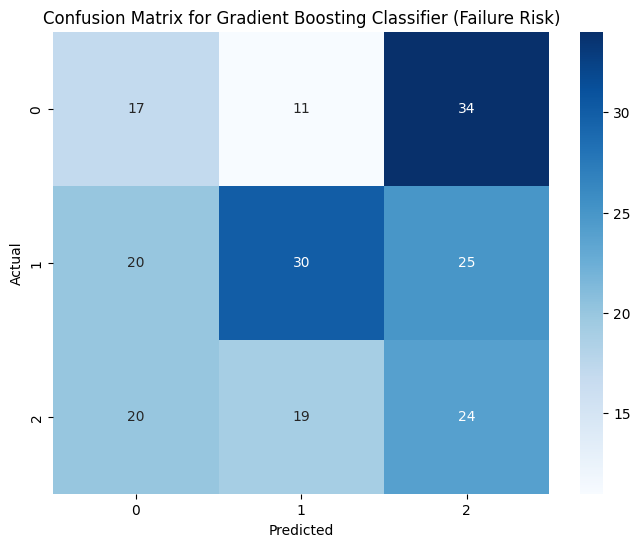

In [ ]:
# Train and predict
for name, model in risk_models.items():
    print(f"\nTraining {name} for Failure Risk...")
    model.fit(X_train, y_risk_train)
    y_risk_pred = model.predict(X_test)

    # Evaluate model
    print(f"{name} Performance:")
    print(classification_report(y_risk_test, y_risk_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_risk_test, y_risk_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name} (Failure Risk)')
    plt.show()

## Model interpretation

Analyze the trained models to understand which features are most important for predicting grid stability and failure risk.


--- Grid Stability Feature Importance/Coefficients ---

Analyzing Logistic Regression:
Top 10 Positive Coefficients:
Apparent Power (kVA)                       0.232318
Previous Fault Occurrences (count)         0.121373
Voltage (V)                                0.102839
Outage Frequency (events/year)             0.099138
Energy Demand Forecast (MW)                0.054227
Reactive Power (kVAR)                      0.038266
Active Power * Transformer Load            0.027042
Load Variability Index                     0.023118
Weather Conditions - Precipitation (mm)    0.023115
FaultType_Unknown                          0.020941
dtype: float64

Top 10 Negative Coefficients:
Solar Radiation (W/m²)                       -0.170493
FaultType_Short Circuit                      -0.137559
Frequency (Hz)                               -0.123157
Harmonic Distortion (%)                      -0.111453
Mean Time Between Failures (MTBF in hours)   -0.090705
Weather Conditions - Temperature (°C)     

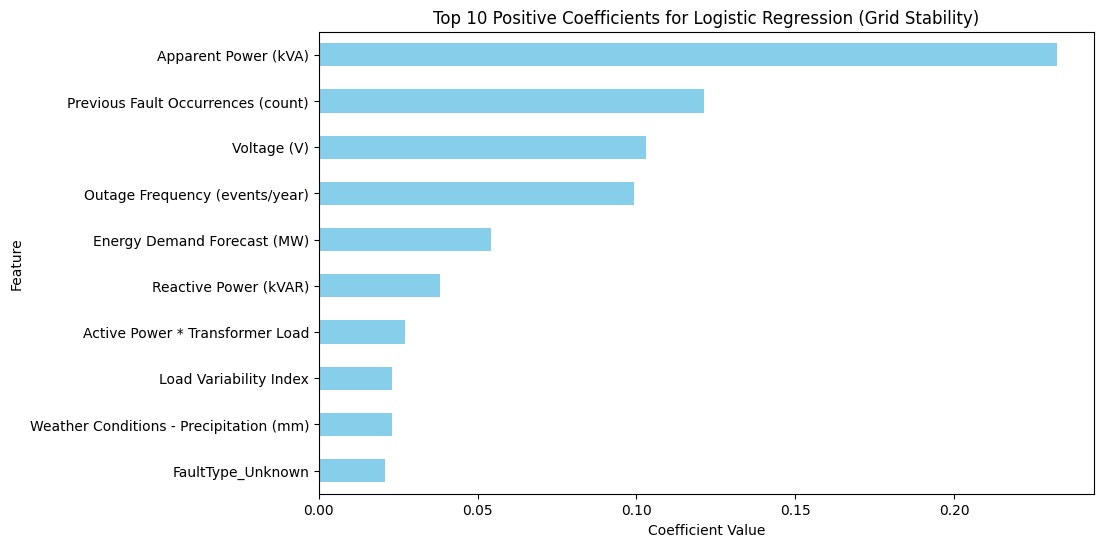

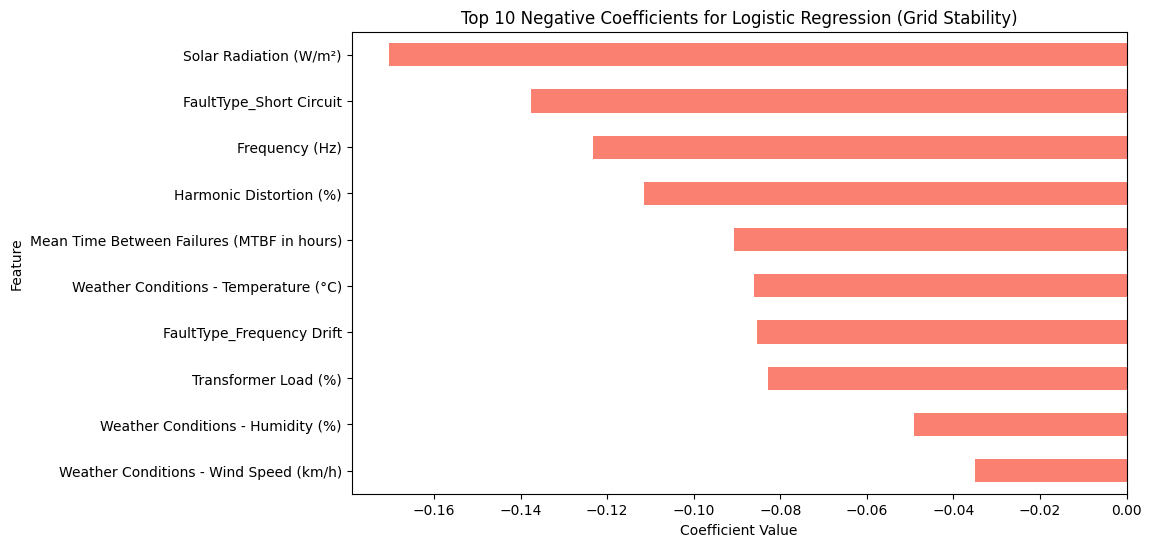


Analyzing Random Forest Classifier:
Top 10 Features:
Harmonic Distortion (%)                  0.046721
Apparent Power (kVA)                     0.045903
Reactive Power (kVAR)                    0.045596
Weather Conditions - Temperature (°C)    0.045559
Smart Meter Readings (kWh)               0.045514
Voltage (V)                              0.044070
Voltage * Current                        0.043573
Weather Conditions - Humidity (%)        0.043562
Solar Radiation (W/m²)                   0.043516
Active Power (kW)                        0.043164
dtype: float64


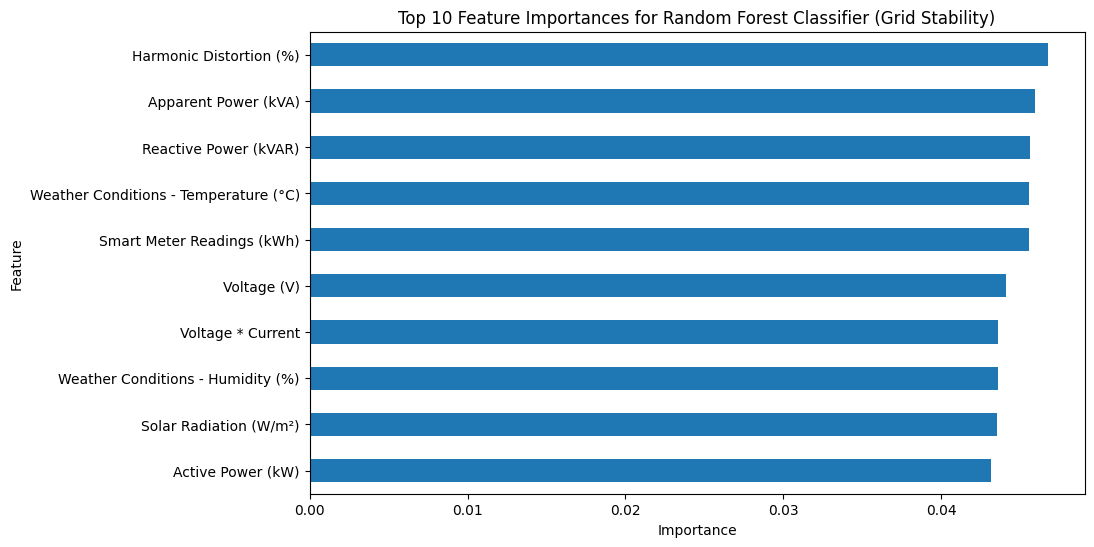


Analyzing Gradient Boosting Classifier:
Top 10 Features:
Mean Time Between Failures (MTBF in hours)    0.079048
Frequency (Hz)                                0.063715
Weather Conditions - Wind Speed (km/h)        0.059242
Current (A)                                   0.057052
Weather Conditions - Humidity (%)             0.056212
Battery Storage Level (%)                     0.054741
Harmonic Distortion (%)                       0.054603
Solar Radiation (W/m²)                        0.052181
Active Power (kW)                             0.051846
Voltage * Current                             0.048089
dtype: float64


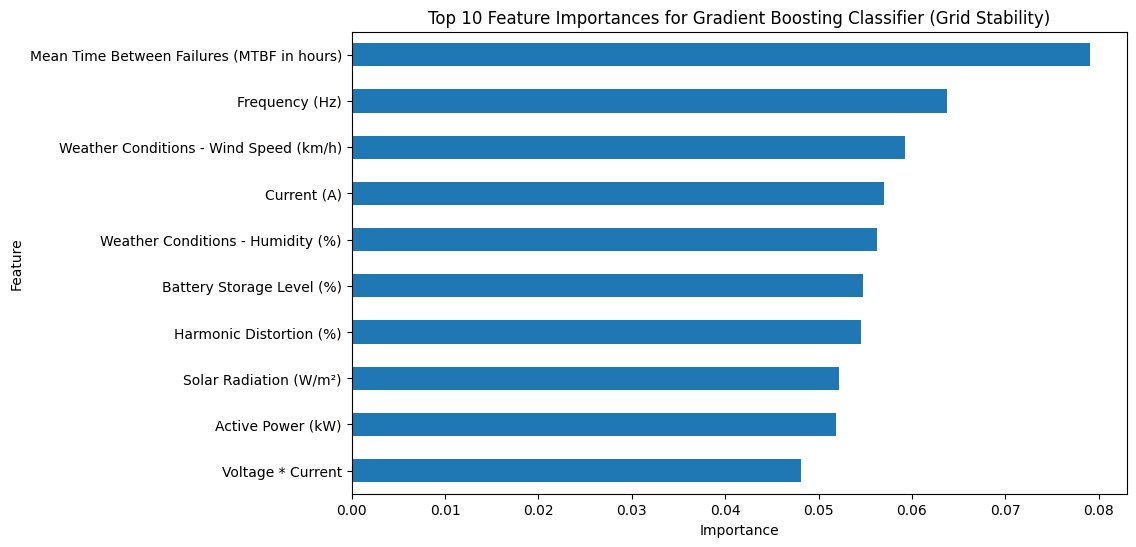

In [ ]:
# Analyze feature importances for Grid Stability models
print("--- Grid Stability Feature Importance/Coefficients ---")
for name, model in stability_models.items():
    print(f"\nAnalyzing {name}:")
    if hasattr(model, 'feature_importances_'):
        # Tree-based models
        importances = pd.Series(model.feature_importances_, index=X_train.columns)
        print("Top 10 Features:")
        print(importances.nlargest(10))
        plt.figure(figsize=(10, 6))
        importances.nlargest(10).plot(kind='barh')
        plt.title(f'Top 10 Feature Importances for {name} (Grid Stability)')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.gca().invert_yaxis()
        plt.show()
    elif hasattr(model, 'coef_'):
        # Logistic Regression
        if model.coef_.ndim > 1:
             # Handle multi-class logistic regression
             coefficients = pd.Series(model.coef_[0], index=X_train.columns)
        else:
             coefficients = pd.Series(model.coef_, index=X_train.columns)

        # Display top positive and negative coefficients
        print("Top 10 Positive Coefficients:")
        print(coefficients.nlargest(10))
        print("\nTop 10 Negative Coefficients:")
        print(coefficients.nsmallest(10))

        # Visualize coefficients
        plt.figure(figsize=(10, 6))
        coefficients.nlargest(10).plot(kind='barh', color='skyblue')
        plt.title(f'Top 10 Positive Coefficients for {name} (Grid Stability)')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.gca().invert_yaxis()
        plt.show()

        plt.figure(figsize=(10, 6))
        coefficients.nsmallest(10).plot(kind='barh', color='salmon')
        plt.title(f'Top 10 Negative Coefficients for {name} (Grid Stability)')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.gca().invert_yaxis()
        plt.show()


--- Failure Risk Feature Importance ---

Analyzing Random Forest Classifier:
Top 10 Features:
Active Power (kW)                          0.046653
Solar Radiation (W/m²)                     0.046633
Weather Conditions - Humidity (%)          0.045258
Frequency (Hz)                             0.045166
Battery Storage Level (%)                  0.045131
Reactive Power (kVAR)                      0.043988
Smart Meter Readings (kWh)                 0.043667
Weather Conditions - Precipitation (mm)    0.043313
Weather Conditions - Temperature (°C)      0.043099
Weather Conditions - Wind Speed (km/h)     0.042386
dtype: float64


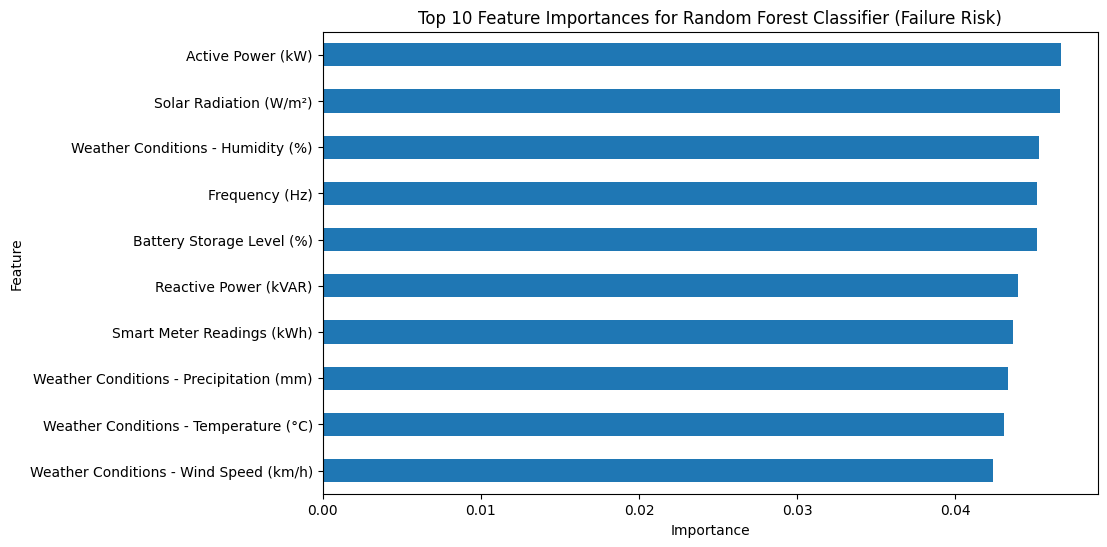


Analyzing Gradient Boosting Classifier:
Top 10 Features:
Solar Radiation (W/m²)                     0.083249
Frequency (Hz)                             0.062608
Harmonic Distortion (%)                    0.059059
Active Power (kW)                          0.057059
Apparent Power (kVA)                       0.053299
Transformer Load (%)                       0.051946
Weather Conditions - Wind Speed (km/h)     0.051723
Load Variability Index                     0.051348
Weather Conditions - Precipitation (mm)    0.048485
Power Factor (PF)                          0.047851
dtype: float64


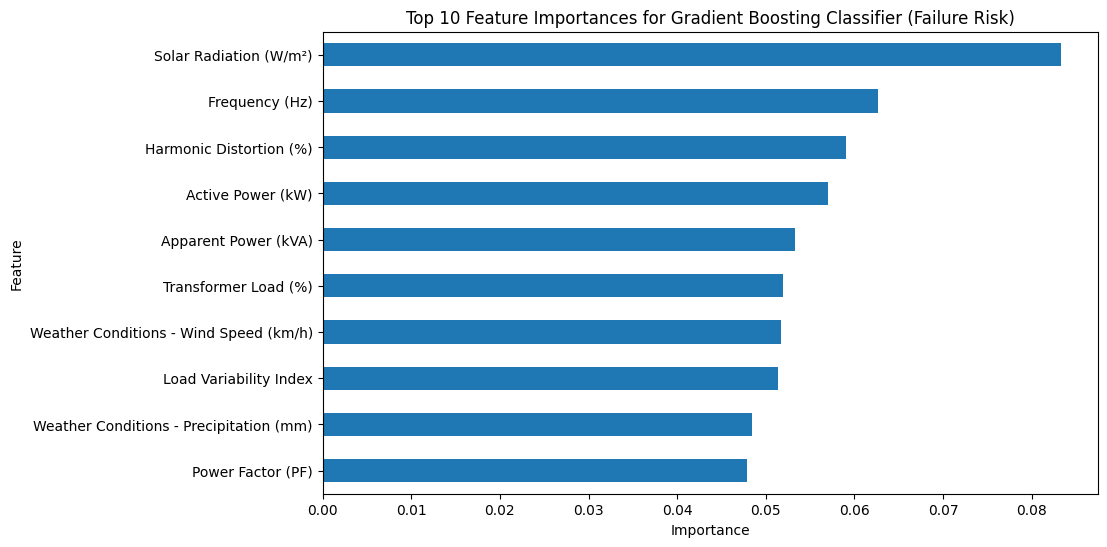

In [ ]:
# Analyze feature importances for Failure Risk models
print("\n--- Failure Risk Feature Importance ---")
for name, model in risk_models.items():
    print(f"\nAnalyzing {name}:")
    if hasattr(model, 'feature_importances_'):
        # Tree-based models
        importances = pd.Series(model.feature_importances_, index=X_train.columns)
        print("Top 10 Features:")
        print(importances.nlargest(10))
        plt.figure(figsize=(10, 6))
        importances.nlargest(10).plot(kind='barh')
        plt.title(f'Top 10 Feature Importances for {name} (Failure Risk)')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.gca().invert_yaxis()
        plt.show()

**Grid Stability Prediction**:
- Logistic Regression: Apparent Power (kVA), Previous Fault Occurrences, Voltage (V), Outage Frequency, and Energy Demand Forecast have the strongest positive correlation with grid stability (encoded as 1). Solar Radiation, Fault Type (Short Circuit, Frequency Drift), Frequency, and Harmonic Distortion show strong negative correlation with grid stability.
- Random Forest Classifier: Harmonic Distortion, Apparent Power (kVA), Reactive Power (kVAR), Weather Conditions - Temperature, and Smart Meter Readings are among the most important features for predicting grid stability.
- Gradient Boosting Classifier: Mean Time Between Failures (MTBF), Frequency, Weather Conditions - Wind Speed, Current, and Weather Conditions - Humidity are highlighted as important predictors for grid stability.
Across different models, features related to power quality (Harmonic Distortion, Frequency), load characteristics (Apparent Power, Reactive Power), historical fault data (Previous Fault Occurrences, Outage Frequency, MTBF), and environmental conditions (Temperature, Wind Speed, Humidity, Solar Radiation) consistently appear as important for predicting grid stability.

**Failure Risk Prediction**:
- Random Forest Classifier: Active Power (kW), Solar Radiation, Weather Conditions - Humidity, Frequency, and Battery Storage Level are among the top features influencing failure risk predictions.
- Gradient Boosting Classifier: Solar Radiation, Frequency, Harmonic Distortion, Active Power (kW), and Apparent Power (kVA) are the most important features for predicting failure risk.
For failure risk, both tree-based models emphasize the importance of environmental factors (Solar Radiation, Humidity, Wind Speed, Precipitation, Temperature), power parameters (Active Power, Apparent Power, Harmonic Distortion, Frequency, Reactive Power), and potentially battery status (Battery Storage Level).

## Predictive modeling on new data

Demonstrate how to use the trained models to make predictions on new, unseen data.


In [ ]:
# Select trained models for prediction
stability_model = stability_models["Random Forest Classifier"]
risk_model = risk_models["Gradient Boosting Classifier"]

# Make predictions on the test data
stability_predictions = stability_model.predict(X_test)
risk_predictions = risk_model.predict(X_test)

# Display the first few predictions
print("First 10 Grid Stability Predictions:")
print(stability_predictions[:10])

print("\nFirst 10 Failure Risk Predictions:")
print(risk_predictions[:10])

First 10 Grid Stability Predictions:
[0 1 1 1 0 1 0 0 0 1]

First 10 Failure Risk Predictions:
[2 2 2 1 0 1 2 2 2 1]


## Summary:

### Data Analysis Key Findings

*   **Grid Stability Prediction:** Trained models (Logistic Regression, Random Forest, Gradient Boosting) achieved accuracy scores around 0.50-0.51, indicating challenges in accurately predicting grid stability with the current features.
*   **Failure Risk Prediction:** Trained models (Random Forest, Gradient Boosting) achieved an overall accuracy of 0.35 for multi-class failure risk prediction, with varying performance across different risk classes.
*   **Feature Importance for Grid Stability:** Features related to power quality (Harmonic Distortion, Frequency), load characteristics (Apparent Power, Reactive Power), historical fault data (Previous Fault Occurrences, Outage Frequency, MTBF), and environmental conditions (Temperature, Wind Speed, Humidity, Solar Radiation) were consistently identified as important predictors across different models.
*   **Feature Importance for Failure Risk:** Environmental factors (Solar Radiation, Humidity, Wind Speed, Precipitation, Temperature), power parameters (Active Power, Apparent Power, Harmonic Distortion, Frequency, Reactive Power), and Battery Storage Level were highlighted as important features for predicting failure risk.

